### اقدامات اولیه

In [1]:
import pandas as pd
import numpy as np

In [2]:
d = pd.read_excel("data.xlsx")
d

,Years,Salary,material 1,material 2,demand,price
0,1990,39343.0,200.000000,89.600000,103,1200.0
1,1991,46205.0,212.000000,92.662500,104,1375.0
2,1992,37731.0,224.720000,95.807250,101,1451.0
3,1993,43525.0,238.203200,99.034819,99,1593.0
4,1994,39891.0,252.495392,102.345626,95,1718.5
5,1995,56642.0,267.645116,105.739927,96,1844.0
6,1996,60150.0,283.703822,109.217795,95,1969.5
7,1997,54445.0,300.726052,112.779099,92,2095.0
8,1998,64445.0,318.769615,116.423489,92,2220.5
9,1999,57189.0,337.895792,120.150370,87,2346.0


In [3]:
d.isnull().sum()

Years         0
Salary        3
material 1    0
material 2    0
demand        0
price         0
dtype: int64

### پاکسازی داده ها

In [4]:
d = d.fillna(method='bfill')
d.isnull().sum()


Years         0
Salary        0
material 1    0
material 2    0
demand        0
price         0
dtype: int64

### رگرسیون حقوق کارکنان  

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
# بیرون کشیدن مقادیر مورد نیاز از جدول
year = d['Years'].values.reshape(-1,1)
salary = d['Salary'].values.reshape(-1 ,1)

In [7]:
# تعریف مدل رگرسیون روی داده های فعلی
salary_model = LinearRegression()
salary_model.fit(year,salary)
i = salary_model.intercept_[0]
c = salary_model.coef_[0][0]

In [8]:
# تعریف تابع برای پیش بینی
def predict(x, i , c):
    return i + c*x

### حقوق پیش بینی شده کارکنان:

In [9]:
#  تعریف دیتا فریم برای مقادیر پیش بینی و نشان دادن آنها
predicted_salary = pd.DataFrame({'Years': [i for i in range(2023,2051)],
                            'Salary': [predict(x,i,c) for x in range(2023, 2051)]})
predicted_salary

,Years,Salary
0,2023,122055.715909
1,2024,124726.758021
2,2025,127397.800134
3,2026,130068.842246
4,2027,132739.884358
5,2028,135410.926471
6,2029,138081.968583
7,2030,140753.010695
8,2031,143424.052807
9,2032,146095.094920


### ترسیم نمودار حقوق فعلی و خط رگرسیون

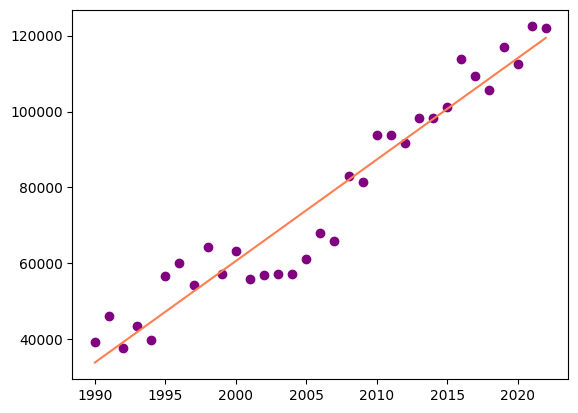

In [10]:
import matplotlib.pylab as plt
plt.scatter(d['Years'], d['Salary']  , c ='purple')
plt.plot(d['Years'], salary_model.predict(year) , c='coral')
plt.show()

### دقت مدل

In [11]:
salary_score = salary_model.score(year, salary)
salary_score

0.9298401700878312

برای ترکیب کردن

In [12]:
salary = pd.DataFrame({'Years' : [i for i in range(1990,2023)],
                        'Salary' : d.loc[0:32,'Salary']})
salary = pd.concat([salary,predicted_salary])
salary = salary['Salary'].tolist()
salary

[39343.0,
 46205.0,
 37731.0,
 43525.0,
 39891.0,
 56642.0,
 60150.0,
 54445.0,
 64445.0,
 57189.0,
 63218.0,
 55794.0,
 56957.0,
 57081.0,
 57081.0,
 61111.0,
 67938.0,
 66029.0,
 83088.0,
 81363.0,
 93940.0,
 93940.0,
 91738.0,
 98273.0,
 98273.0,
 101302.0,
 113812.0,
 109431.0,
 105582.0,
 116969.0,
 112635.0,
 122391.0,
 121872.0,
 122055.71590909082,
 124726.75802139007,
 127397.8001336893,
 130068.84224598948,
 132739.88435828872,
 135410.92647058796,
 138081.9685828872,
 140753.01069518737,
 143424.05280748662,
 146095.09491978586,
 148766.1370320851,
 151437.17914438527,
 154108.2212566845,
 156779.26336898375,
 159450.305481283,
 162121.34759358317,
 164792.3897058824,
 167463.43181818165,
 170134.4739304809,
 172805.51604278106,
 175476.5581550803,
 178147.60026737954,
 180818.6423796788,
 183489.68449197896,
 186160.7266042782,
 188831.76871657744,
 191502.81082887668,
 194173.85294117592]

**دقت مدل 0.92 است که دقت خوبی است**

### 4: پیش بینی قیمت ماده اولیه 1
#####   با توجه به توضیح داده شده در خواسته 4، داده های هر سال را با استفاده از قیمت سال آخر موجود ،یعنی 2022، ضربدر فاکتور، که مجموع نرخ بهره و افزایش قیمت است، به توان اختلاف تا سال مورد نظر بدست آوردیم

In [13]:
m1_2022 = 1290.677336
fac = 1.06
predicted_material1 = pd.DataFrame({'Years': [i for i in range(2023,2051)],
                            'material1': [m1_2022*1.06**i for i in range(1,29)]})
predicted_material1

,Years,material1
0,2023,1368.117976
1,2024,1450.205055
2,2025,1537.217358
3,2026,1629.450399
4,2027,1727.217423
5,2028,1830.850469
6,2029,1940.701497
7,2030,2057.143587
8,2031,2180.572202
9,2032,2311.406534


In [14]:
material1 = pd.DataFrame({'Years' : [i for i in range(1990,2023)],
                        'material1' : d.loc[0:32,'material 1']})
material1 = pd.concat([material1,predicted_material1])
material1 = material1['material1'].tolist()
material1

[200.0,
 212.0,
 224.72,
 238.2032,
 252.495392,
 267.64511552,
 283.7038224512,
 300.726051798272,
 318.769614906168,
 337.895791800538,
 358.16953930857,
 379.659711667085,
 402.43929436711,
 426.585652029136,
 452.180791150885,
 479.311638619938,
 508.070336937134,
 538.554557153362,
 570.867830582564,
 605.119900417518,
 641.427094442569,
 679.912720109123,
 720.707483315671,
 763.949932314611,
 809.786928253488,
 858.374143948697,
 909.876592585619,
 964.469188140756,
 1022.3373394292,
 1083.67757979495,
 1148.69823458265,
 1217.62012865761,
 1290.67733637706,
 1368.1179761600001,
 1450.2050547296,
 1537.217358013376,
 1629.450399494179,
 1727.2174234638296,
 1830.8504688716594,
 1940.7014970039593,
 2057.143586824197,
 2180.572202033649,
 2311.406534155668,
 2450.090926205008,
 2597.0963817773086,
 2752.9221646839474,
 2918.0974945649846,
 3093.1833442388834,
 3278.774344893217,
 3475.5008055868097,
 3684.0308539220187,
 3905.07270515734,
 4139.37706746678,
 4387.739691514787,
 4

### 5:
تبدیل قیمت های فعلی به سال پایه, 1990

In [15]:
from EE_factors import *
i = 0.05
value2_in_1990 = [F_to_P(i , n ,
                        d.loc[n,'material 2'] ) for n in range(0,33) ]

In [16]:
material2 = pd.DataFrame({'year' : [i for i in range(1990,2023)],
                        'material 2' : d.loc[0:32,'material 2'],
                        'value 1990': value2_in_1990 })
material2

,year,material 2,value 1990
0,1990,89.600000,89.60
1,1991,92.662500,88.25
2,1992,95.807250,86.90
3,1993,99.034819,85.55
4,1994,102.345626,84.20
5,1995,105.739927,82.85
6,1996,109.217795,81.50
7,1997,112.779099,80.15
8,1998,116.423489,78.80
9,1999,120.150370,77.45


### پیش بینی قیمت ماده 2 بر اساس مدل رگرسیون در 1990

In [17]:
year = material2['year'].values.reshape(-1,1)
value_1990 = material2['value 1990'].values.reshape(-1 ,1)
# تعریف مدل رگرسیون
material2_model = LinearRegression()
material2_model.fit(year,value_1990)
i_value_1990 = material2_model.intercept_[0]
c_value_1990 = material2_model.coef_[0][0]
# پیش بینی با رگرسیون برای ارزش فعلی قیمت ها
predicted_value_1990= [predict(x,i_value_1990,c_value_1990) for x in range(2023, 2051)]
print(predicted_value_1990)

[45.04999999999973, 43.69999999999982, 42.34999999999991, 41.0, 39.649999999999636, 38.29999999999973, 36.94999999999982, 35.59999999999991, 34.25, 32.899999999999636, 31.549999999999727, 30.199999999999818, 28.84999999999991, 27.499999999999545, 26.149999999999636, 24.799999999999727, 23.449999999999818, 22.09999999999991, 20.749999999999545, 19.399999999999636, 18.049999999999727, 16.699999999999818, 15.349999999999909, 13.999999999999545, 12.649999999999636, 11.299999999999727, 9.949999999999818, 8.599999999999909]


### تبدیل قیمت پیش بینی شده ماده 2 در 1990 به سال فعلی

In [18]:
predicted_material2 = pd.DataFrame({'year': [i for i in range(2023,2051)],
                     'material 2' : [P_to_F(i, x-1990 , predict(x,i_value_1990,c_value_1990) ) for x in range(2023, 2051)]})

predicted_material2


,year,material 2
0,2023,225.393644
1,2024,229.571306
2,2025,233.603251
3,2026,237.464462
4,2027,241.127785
5,2028,244.563780
6,2029,247.740555
7,2030,250.623598
8,2031,253.175594
9,2032,255.356231


همانطور که مشاهده میشود از سال 2036 به بعد پیش بینی ها نشان میدهد که قیمت ماده 2 رو به کاهش میگذارد

### 6 : نمایش، خط رگرسیون، دقت
برای این کار دو دیتا فریم  قیمت های موجود و پیش بینی شده را مرج میکنیم و دوباره محاسبات را انجام مبدهیم

In [19]:
material2 = pd.DataFrame({'year' : [i for i in range(1990,2023)],
                        'material 2' : d.loc[0:32,'material 2']})
material2 = pd.concat([material2,predicted_material2])
material2

,year,material 2
0,1990,89.600000
1,1991,92.662500
2,1992,95.807250
3,1993,99.034819
4,1994,102.345626
...,...,...
23,2046,215.143774
24,2047,204.117656
25,2048,191.451066
26,2049,177.007523


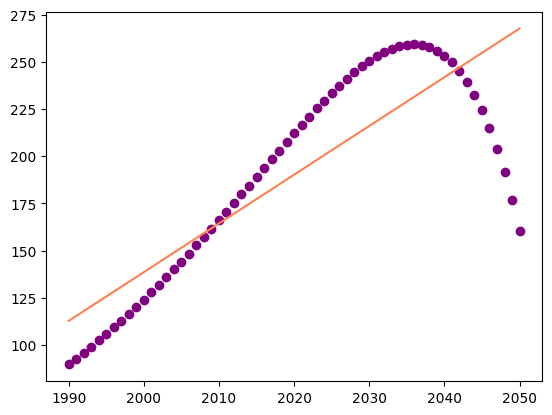

دقت مدل رگرسیون:0.6986786392273989


In [20]:
# بیرون کشیدن مقادیر مورد نیاز از جدول
year = material2['year'].values.reshape(-1,1)
material2_price = material2['material 2'].values.reshape(-1 ,1)
# تعریف مدل رگرسیون روی داده های فعلی
material2_model = LinearRegression()
material2_model.fit(year,material2_price)
i_material2 = material2_model.intercept_[0]
c_material2 = material2_model.coef_[0][0]
#رسم نمودار
plt.scatter(material2['year'], material2['material 2']  , c ='purple')
plt.plot(material2['year'], material2_model.predict(year) , c='coral')
plt.show()
# نمایش دقت
material2_score = material2_model.score(year, material2_price)
print(f'دقت مدل رگرسیون:{material2_score}')

In [21]:
material2 = material2['material 2'].tolist()

همانطور که مشاهده میشود مدل رگرسیون شیب یکنواخت صعودی را پیش بینی کرده بود، اما با توجه به پیش بینی ما قیمت از 2036 کاهش پیدا میکرد. فلذا این عامل دقت پایین مدل است.

### بخش 7 تا 9:نمودار تقاضا، رگرسیون و دقت

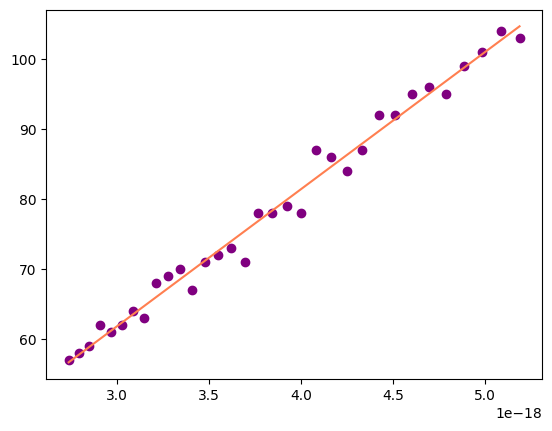

دقت مدل رگرسیون:0.9849573838479749


In [22]:
import math
e_powers = pd.DataFrame({'year': [i for i in range(1990,2051)],
                     'e powers' : [math.e**(-i/50) for i in range(1990, 2051)]})

X = e_powers.loc[0:32,'e powers'].values.reshape(-1,1)
Y = d['demand'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X,Y)
intercept = model.intercept_[0]
coefficient = model.coef_[0][0]

#رسم نمودار
plt.scatter(e_powers.loc[0:32,'e powers'], d['demand']  , c ='purple')
plt.plot(e_powers.loc[0:32,'e powers'], model.predict(X) , c='coral')
plt.show()

# نمایش دقت
model = model.score(X, Y)
print(f'دقت مدل رگرسیون:{model}')


In [23]:
predicted_demand = pd.DataFrame({'Years': [i for i in range(2023,2051)],
                            'demand': [predict(i,intercept,coefficient)for i in e_powers.loc[33:61,'e powers'] ]})
demand = pd.DataFrame({'Years' : [i for i in range(1990,2023)],
                        'demand' : d.loc[0:32,'demand']})
demand = pd.concat([demand,predicted_demand])
demand = demand['demand'].tolist()

### 11: نمودار قیمت محصول نهایی، رگرسیون و دقت

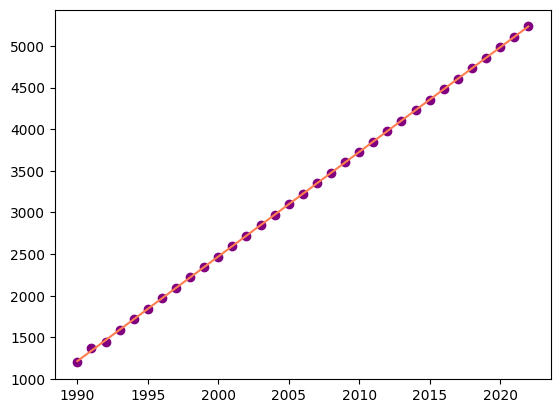

دقت مدل رگرسیون:0.9999653378861689


In [24]:
# بیرون کشیدن مقادیر مورد نیاز از جدول
year = d['Years'].values.reshape(-1,1)
price = d['price'].values.reshape(-1 ,1)
# تعریف مدل رگرسیون روی داده های فعلی
price_model = LinearRegression()
price_model.fit(year,price)
i_price = price_model.intercept_[0]
c_price = price_model.coef_[0][0]
#رسم نمودار
plt.scatter(d['Years'], d['price']  , c ='purple')
plt.plot(d['Years'], price_model.predict(year) , c='coral')
plt.show()
# نمایش دقت
price_score = price_model.score(year, price)
print(f'دقت مدل رگرسیون:{price_score}')

مدل رگرسیون برای داده های موجود برای قیمت محصول نهایی دقت بسیار بالای نزدیک به 1 را دارد

### 10: پیش بینی قیمت هر واحد محصول نهایی

In [25]:
#  تعریف دیتا فریم برای مقادیر پیش بینی و نشان دادن آنها
predicted_price = pd.DataFrame({'Years': [i for i in range(2023,2051)],
                            'price': [predict(x,i_price,c_price) for x in range(2023, 2051)]})
predicted_price

,Years,price
0,2023,5358.0
1,2024,5483.5
2,2025,5609.0
3,2026,5734.5
4,2027,5860.0
5,2028,5985.5
6,2029,6111.0
7,2030,6236.5
8,2031,6362.0
9,2032,6487.5


برای نرکیب فایل

In [26]:
price = pd.DataFrame({'Years' : [i for i in range(1990,2023)],
                        'price' : d.loc[0:32,'price']})
price = pd.concat([price,predicted_price])
price = price['price'].tolist()
price

[1200.0,
 1375.0,
 1451.0,
 1593.0,
 1718.5,
 1844.0,
 1969.5,
 2095.0,
 2220.5,
 2346.0,
 2471.5,
 2597.0,
 2722.5,
 2848.0,
 2973.5,
 3099.0,
 3224.5,
 3350.0,
 3475.5,
 3601.0,
 3726.5,
 3852.0,
 3977.5,
 4103.0,
 4228.5,
 4354.0,
 4479.5,
 4605.0,
 4730.5,
 4856.0,
 4981.5,
 5107.0,
 5232.5,
 5358.0,
 5483.5,
 5609.0,
 5734.5,
 5860.0,
 5985.5,
 6111.0,
 6236.5,
 6362.0,
 6487.5,
 6613.0,
 6738.5,
 6864.0,
 6989.5,
 7115.0,
 7240.5,
 7366.0,
 7491.5,
 7617.0,
 7742.5,
 7868.0,
 7993.5,
 8119.0,
 8244.5,
 8370.0,
 8495.5,
 8621.0,
 8746.5]

ترکیب فایل

In [27]:
d2 = pd.DataFrame({'Years' : [i for i in range(1990,2051)],
                    'Salary' : salary,
                  'material 1' : material1,
                  'material 2' : material2,
                  'demand' : demand,
                  'price': price})
d2

,Years,Salary,material 1,material 2,demand,price
0,1990,39343.000000,200.000000,89.600000,103.000000,1200.0
1,1991,46205.000000,212.000000,92.662500,104.000000,1375.0
2,1992,37731.000000,224.720000,95.807250,101.000000,1451.0
3,1993,43525.000000,238.203200,99.034819,99.000000,1593.0
4,1994,39891.000000,252.495392,102.345626,95.000000,1718.5
...,...,...,...,...,...,...
56,2046,183489.684492,5225.868176,215.143774,36.339007,8244.5
57,2047,186160.726604,5539.420267,204.117656,35.684136,8370.0
58,2048,188831.768717,5871.785483,191.451066,35.042232,8495.5
59,2049,191502.810829,6224.092612,177.007523,34.413039,8621.0


### خواسته 1

In [28]:
cost = []
for i in range(61):
  if(d2['demand'][i]>60):
    cost.append(d2['demand'][i]*(d2['price'][i]-d2['material 1'][i]-0.82*d2['material 2'][i])-d2['Salary'][i])
  elif(d2['demand'][i]>40 and d2['demand'][i]<=60):
     cost.append(d2['demand'][i]*(d2['price'][i]-d2['material 1'][i]-0.9*d2['material 2'][i])-d2['Salary'][i])
  elif(d2['demand'][i]>20 and d2['demand'][i]<=40):
     cost.append(d2['demand'][i]*(d2['price'][i]-d2['material 1'][i]-0.95*d2['material 2'][i])-d2['Salary'][i])
  else:
     cost.append(d2['demand'][i]*(d2['price'][i]-d2['material 1'][i]-d2['material 2'][i])-d2['Salary'][i])
d2['benefit']=cost
j = 0
while(d2['benefit'][j] >= 0):
  j = j+1
print("The first year with negative benefit prediction is", j+1990)

The first year with negative benefit prediction is 2038


### خواسته 2


In [42]:
from EE_factors import *
table = d2.loc[d2['Years'] <= 2022 , :]
    
table.loc[:, "saved"] = table["benefit"] * 0.25 * 0.2

# table["saved"] = table["benefit"] * 0.25 * 0.2
i = 0.05
PV = 0
for n,f in enumerate(table["saved"]):
    PV += F_to_P(i, n, f)
n = 2032 - 2022 + 1
saving = p_to_a(i, n, PV)
print(f"مقدار ثابت سرمایه گذاری:{saving}")
table

مقدار ثابت سرمایه گذاری:892349523.6515304


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9880\2802130873.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table.loc[:, "saved"] = table["benefit"] * 0.25 * 0.2


,Years,Salary,material 1,material 2,demand,price,benefit,saved
0,1990,39343.0,200.000000,89.600000,103.0,1200.0,56089.384000,2804.469200
1,1991,46205.0,212.000000,92.662500,104.0,1375.0,66844.742000,3342.237100
2,1992,37731.0,224.720000,95.807250,101.0,1451.0,78188.523555,3909.426178
3,1993,43525.0,238.203200,99.034819,99.0,1593.0,82560.236614,4128.011831
4,1994,39891.0,252.495392,102.345626,95.0,1718.5,91406.713475,4570.335674
5,1995,56642.0,267.645116,105.739927,96.0,1844.0,86364.221821,4318.211091
6,1996,60150.0,283.703822,109.217795,95.0,1969.5,91492.570659,4574.628533
7,1997,54445.0,300.726052,112.779099,92.0,2095.0,102120.148015,5106.007401
8,1998,64445.0,318.769615,116.423489,92.0,2220.5,101731.207421,5086.560371
9,1999,57189.0,337.895792,120.150370,87.0,2346.0,108944.538694,5447.226935


### خواسته 3

In [43]:

i = 0.05
FV = 0
for n,p in enumerate(table["benefit"]):
    FV += P_to_F(i, 32 - n , p)
benefit = 250000
price = FV - benefit

print(f'قیمت سرمایه گذاری:{price}')

قیمت سرمایه گذاری:7954683.945885839
